In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.preprocessing import StandardScaler 

In [3]:
#IMPORT TRE DATA
data=pd.read_csv('Dataframe_Study2_ECGsignal.csv')

In [49]:
df=pd.DataFrame(data)
df

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1,472.0,633.067797,95.111328,5.596500,14.685775,38.126336,19.698201,13.142063,1.910828,...,9.060048,35.557355,64.442645,0.551767,15674.539755,13.928721,52.054050,3.737174,1.196584,-1.0
1,1,282.0,633.797872,94.957639,5.295495,15.437722,34.964419,19.589561,12.080853,1.067616,...,9.108754,35.414741,64.585259,0.548341,16393.972788,13.851732,47.446242,3.425293,1.391884,208.0
2,1,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
3,2,438.0,682.826484,88.128099,4.771772,16.157895,37.144495,20.816458,13.139347,2.059497,...,9.060304,36.066585,63.933415,0.564127,15815.174364,14.719457,50.414864,3.425049,1.435334,-1.0
4,2,268.0,666.746269,90.255192,4.875405,15.198502,36.593564,19.099385,11.588573,1.123596,...,9.121223,35.383463,64.616537,0.547591,16590.789950,13.500916,49.575219,3.671989,1.423566,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185,347.0,515.818444,NaN,7.384019,11.962428,37.752447,23.626856,20.404213,1.734104,...,9.105778,34.654331,65.345669,0.530323,16147.875484,16.706709,50.518112,3.023822,0.906509,208.0
554,185,324.0,550.521605,109.223667,4.937727,13.167183,26.510752,17.750856,11.923015,1.547988,...,9.094684,35.006366,64.993634,0.538612,16082.202403,12.551746,35.237809,2.807403,1.118727,309.0
555,186,390.0,764.643590,78.587904,3.107465,14.753213,29.648908,18.342430,10.913000,0.514139,...,9.075834,35.652062,64.347938,0.554051,15954.796546,12.969918,39.699427,3.060885,1.588712,-1.0
556,186,232.0,766.500000,78.477504,4.015693,15.614719,38.337192,19.157018,11.122384,0.865801,...,9.157152,35.052305,64.947695,0.539701,17076.379939,13.544685,52.275968,3.859519,1.304293,209.0


In [50]:
df.columns

Index(['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std',
       'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index',
       'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2',
       'SampEntropy', 'Label'],
      dtype='object')

In [51]:
df.isnull().sum()

Patien ID                0
NNI counter              3
NNI mean                 8
HR mean                  9
HR std                  16
NNI diff mean           18
SDNN                    15
RMSSD                   20
SDSD                    26
pnn50                   13
pnn20                    0
TRI Index               11
Welch LogPower VLF       5
Welch LogPower LF        6
Welch LogPower HF        9
Welch NormPower LF       5
Welch NormPower HF       5
Welch LF/HF             34
Welch TotPower          22
AutoReg LogPower VLF     8
AutoReg LogPower LF      5
AutoReg LogPower HF      8
AutoReg NormPower LF     8
AutoReg NormPower HF     8
AutoReg LF/HF            7
AutoReg TotPower         8
SD1                     20
SD2                     14
SD1/SD2                 18
SampEntropy              6
Label                    0
dtype: int64

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558 entries, 0 to 557
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Patien ID             558 non-null    int64  
 1   NNI counter           555 non-null    float64
 2   NNI mean              550 non-null    float64
 3   HR mean               549 non-null    float64
 4   HR std                542 non-null    float64
 5   NNI diff mean         540 non-null    float64
 6   SDNN                  543 non-null    float64
 7   RMSSD                 538 non-null    float64
 8   SDSD                  532 non-null    float64
 9   pnn50                 545 non-null    float64
 10  pnn20                 558 non-null    float64
 11  TRI Index             547 non-null    float64
 12  Welch LogPower VLF    553 non-null    float64
 13  Welch LogPower LF     552 non-null    float64
 14  Welch LogPower HF     549 non-null    float64
 15  Welch NormPower LF    5

In [53]:
# KEEPING ALL DATATYPES AS FLOAT   
df['Patien ID']  = df['Patien ID'].astype('float64')
df['NNI counter']  = df['NNI counter'].astype('float64')

In [54]:
df.columns

Index(['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std',
       'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index',
       'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2',
       'SampEntropy', 'Label'],
      dtype='object')

In [55]:
df.columns[:].duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False])

In [56]:
# FINDINDOUT THE DUPLICATES
df[df.duplicated()]

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label


In [57]:
df['Label']

0       -1.0
1      208.0
2      308.0
3       -1.0
4      208.0
       ...  
553    208.0
554    309.0
555     -1.0
556    209.0
557    308.0
Name: Label, Length: 558, dtype: float64

In [58]:
df['Label'].unique()

array([ -1., 208., 308., 108., 209., 309.])

In [59]:
df.describe()

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
count,558.000000,555.000000,550.000000,549.000000,542.000000,540.000000,543.000000,538.000000,532.000000,545.000000,...,550.000000,550.000000,550.000000,551.000000,550.000000,538.000000,544.000000,540.000000,552.000000,558.000000
mean,93.500000,288.535135,762.271189,79.818316,5.710559,25.528966,54.796299,33.839344,21.500989,13.306272,...,9.148135,35.196967,64.803033,0.543207,16974.385018,23.926819,72.830045,3.168929,1.377029,150.440860
std,53.740976,81.208695,106.428120,11.185707,1.856930,11.582354,19.607338,15.455459,9.931727,12.818204,...,0.051599,0.634696,0.634696,0.015169,700.710980,10.928516,25.943457,0.956322,0.286424,120.950288
min,1.000000,148.000000,485.635870,50.200617,1.656220,3.062389,14.800060,4.139717,2.787990,0.000000,...,9.018021,33.457350,63.080494,0.500429,15135.096734,2.927152,20.689912,0.993444,0.590817,-1.000000
25%,47.000000,225.500000,686.883420,71.793813,4.243302,16.423461,40.170673,21.990052,13.939066,2.456140,...,9.111702,34.767407,64.358115,0.532916,16499.847298,15.548814,53.453070,2.514164,1.175720,-1.000000
50%,93.500000,261.000000,758.612686,79.276563,5.510692,23.014952,52.880231,30.888640,19.698328,8.974359,...,9.147733,35.268238,64.731762,0.544814,16987.990336,21.841106,70.490117,3.044983,1.408211,208.000000
75%,140.000000,349.500000,836.722503,87.332043,6.980018,33.343912,68.949775,43.765296,27.629583,21.153846,...,9.185095,35.641885,65.232593,0.553791,17466.373897,30.946083,91.555670,3.777283,1.577217,209.000000
max,186.000000,530.000000,1050.045775,109.946828,11.258072,59.872222,111.951630,79.616155,51.572257,51.046025,...,9.279337,36.919506,66.542650,0.585276,18961.371374,56.296666,150.625292,5.757550,2.174235,309.000000


In [60]:
# CHECKING OUTLIERS

def outliers_detected(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_fence= Q1 - 1.5 * IQR
    upper_fence= Q3 + 1.5 * IQR
    out_liers=df.index[np.logical_or(df[column]<lower_fence,
                                      df[column]>upper_fence)]
    return out_liers
    
    
# outliers detected  now we need to remove them 
outliers=[outliers_detected(df,df.columns[i]) for i in range(len(df.columns[:]))]

out=pd.Series(outliers,df.columns[:] )
print(len(outliers),df.shape)
out

31 (558, 31)


Patien ID                                   Int64Index([], dtype='int64')
NNI counter                                 Int64Index([], dtype='int64')
NNI mean                                    Int64Index([], dtype='int64')
HR mean                                     Int64Index([], dtype='int64')
HR std                          Int64Index([66, 202, 231], dtype='int64')
NNI diff mean                            Int64Index([427], dtype='int64')
SDNN                                        Int64Index([], dtype='int64')
RMSSD                     Int64Index([152, 427, 525, 526], dtype='int64')
SDSD                    Int64Index([70, 98, 161, 271, 294, 310, 397, 4...
pnn50                          Int64Index([232, 284, 428], dtype='int64')
pnn20                                       Int64Index([], dtype='int64')
TRI Index                                 Int64Index([49], dtype='int64')
Welch LogPower VLF               Int64Index([14, 41, 128], dtype='int64')
Welch LogPower LF                     

In [61]:
for i in range(len(outliers)):
        df[df.columns[i]]=df[df.columns[i]].drop(outliers_detected(df,df.columns[i]))
        print(df[df.columns[i]])

0        1.0
1        1.0
2        1.0
3        2.0
4        2.0
       ...  
553    185.0
554    185.0
555    186.0
556    186.0
557    186.0
Name: Patien ID, Length: 558, dtype: float64
0      472.0
1      282.0
2      274.0
3      438.0
4      268.0
       ...  
553    347.0
554    324.0
555    390.0
556    232.0
557    236.0
Name: NNI counter, Length: 558, dtype: float64
0      633.067797
1      633.797872
2      653.729927
3      682.826484
4      666.746269
          ...    
553    515.818444
554    550.521605
555    764.643590
556    766.500000
557    755.105932
Name: NNI mean, Length: 558, dtype: float64
0       95.111328
1       94.957639
2       92.000089
3       88.128099
4       90.255192
          ...    
553           NaN
554    109.223667
555     78.587904
556     78.477504
557     79.574652
Name: HR mean, Length: 558, dtype: float64
0      5.596500
1      5.295495
2      4.418761
3      4.771772
4      4.875405
         ...   
553    7.384019
554    4.937727
555    3.10

In [62]:
df.isnull().sum()

Patien ID                0
NNI counter              3
NNI mean                 8
HR mean                  9
HR std                  19
NNI diff mean           19
SDNN                    15
RMSSD                   24
SDSD                    35
pnn50                   16
pnn20                    0
TRI Index               12
Welch LogPower VLF       8
Welch LogPower LF        6
Welch LogPower HF        9
Welch NormPower LF       5
Welch NormPower HF       5
Welch LF/HF             43
Welch TotPower          29
AutoReg LogPower VLF     9
AutoReg LogPower LF      5
AutoReg LogPower HF      8
AutoReg NormPower LF     8
AutoReg NormPower HF     8
AutoReg LF/HF            9
AutoReg TotPower         9
SD1                     24
SD2                     16
SD1/SD2                 20
SampEntropy              6
Label                    0
dtype: int64

In [75]:
df=df.fillna(df.mean())


In [76]:
df.isnull().sum()

Patien ID               0
NNI counter             0
NNI mean                0
HR mean                 0
HR std                  0
NNI diff mean           0
SDNN                    0
RMSSD                   0
SDSD                    0
pnn50                   0
pnn20                   0
TRI Index               0
Welch LogPower VLF      0
Welch LogPower LF       0
Welch LogPower HF       0
Welch NormPower LF      0
Welch NormPower HF      0
Welch LF/HF             0
Welch TotPower          0
AutoReg LogPower VLF    0
AutoReg LogPower LF     0
AutoReg LogPower HF     0
AutoReg NormPower LF    0
AutoReg NormPower HF    0
AutoReg LF/HF           0
AutoReg TotPower        0
SD1                     0
SD2                     0
SD1/SD2                 0
SampEntropy             0
Label                   0
dtype: int64

In [77]:
# APPLYING FEATURE SCALEING 

# SCALED WITHOUT PATIEN ID AND LABEL FEATURE , AND ADDED LABEL FEATURE AFTER SCALEING

# from sklearn.preprocessing import MinMaxScaler

# minmaxscaler = MinMaxScaler(feature_range=(0,1))
# minmaxscaler = scaler.fit_transform(DF)
# df1.columns=DF.columns


df

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1.0,472.0,633.067797,95.111328,5.596500,14.685775,38.126336,19.698201,13.142063,1.910828,...,9.060048,35.557355,64.442645,0.551767,15674.539755,13.928721,52.054050,3.737174,1.196584,-1.0
1,1.0,282.0,633.797872,94.957639,5.295495,15.437722,34.964419,19.589561,12.080853,1.067616,...,9.108754,35.414741,64.585259,0.548341,16393.972788,13.851732,47.446242,3.425293,1.391884,208.0
2,1.0,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
3,2.0,438.0,682.826484,88.128099,4.771772,16.157895,37.144495,20.816458,13.139347,2.059497,...,9.060304,36.066585,63.933415,0.564127,15815.174364,14.719457,50.414864,3.425049,1.435334,-1.0
4,2.0,268.0,666.746269,90.255192,4.875405,15.198502,36.593564,19.099385,11.588573,1.123596,...,9.121223,35.383463,64.616537,0.547591,16590.789950,13.500916,49.575219,3.671989,1.423566,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185.0,347.0,515.818444,79.276563,7.384019,11.962428,37.752447,23.626856,20.404213,1.734104,...,9.105778,34.654331,65.345669,0.530323,16147.875484,16.706709,50.518112,3.023822,0.906509,208.0
554,185.0,324.0,550.521605,109.223667,4.937727,13.167183,26.510752,17.750856,11.923015,1.547988,...,9.094684,35.006366,64.993634,0.538612,16082.202403,12.551746,35.237809,2.807403,1.118727,309.0
555,186.0,390.0,764.643590,78.587904,3.107465,14.753213,29.648908,18.342430,10.913000,0.514139,...,9.075834,35.652062,64.347938,0.554051,15954.796546,12.969918,39.699427,3.060885,1.588712,-1.0
556,186.0,232.0,766.500000,78.477504,4.015693,15.614719,38.337192,19.157018,11.122384,0.865801,...,9.157152,35.052305,64.947695,0.539701,17076.379939,13.544685,52.275968,3.859519,1.304293,209.0


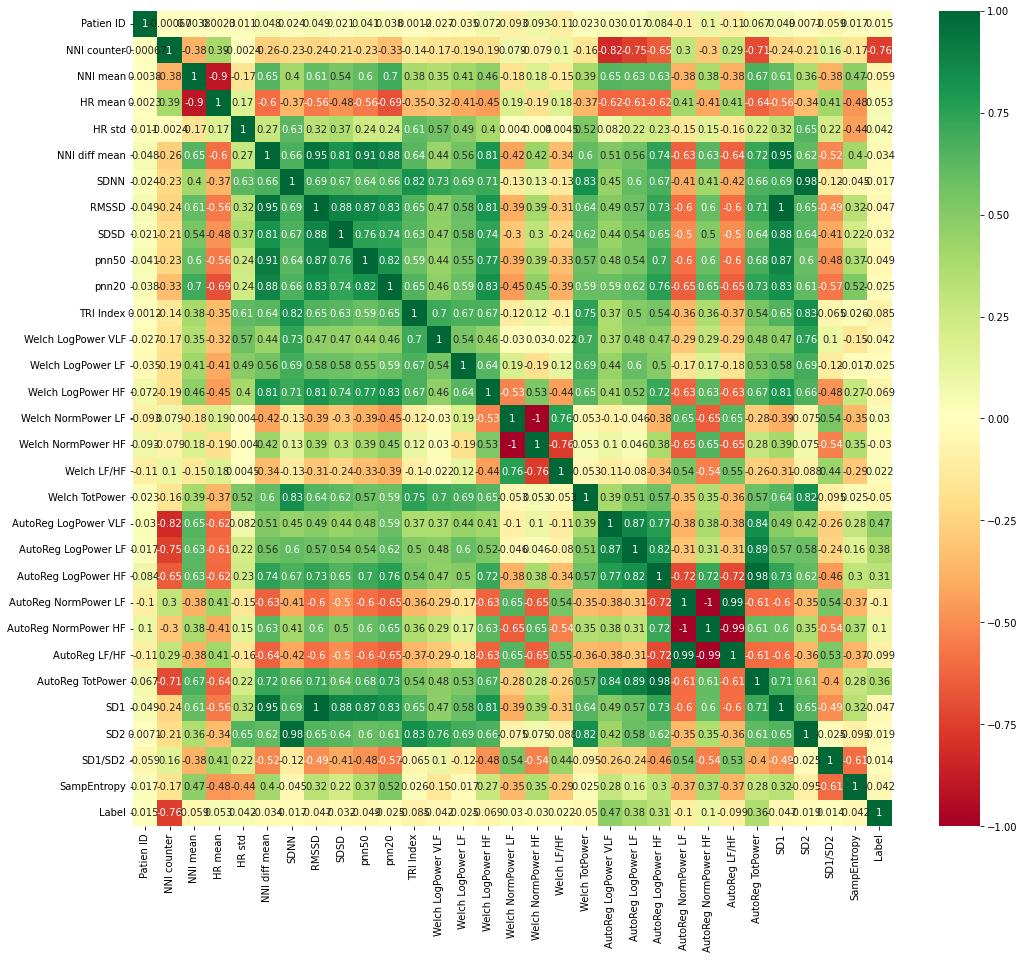

In [113]:
# To visualize the results we can use the heatmap (seaborn module)
import matplotlib.pyplot as plt

plt.figure(figsize=(17,15))
g=sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [79]:
# VISUALIZING [LOW POSTIVE EMOTION, HIGH POSTIVE EMOTION,NORMAL EMOTION STATE]

In [80]:
# LOW POSTIVE EMOTION

L=pd.DataFrame(df[df['Label']==308])
L

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
2,1.0,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
11,4.0,206.0,865.558252,69.699199,5.265377,34.141463,63.302557,43.112162,26.389698,22.926829,...,9.208802,34.883054,65.116946,0.535699,17883.643876,30.483805,83.829865,2.749980,1.400088,308.0
26,9.0,244.0,731.049180,82.231530,3.553502,17.090535,32.634364,22.257842,14.288643,3.292181,...,9.142005,35.504891,64.495109,0.550505,16954.872039,15.738668,43.328262,2.752981,1.553938,308.0
29,10.0,197.0,905.791878,66.465394,3.904720,44.892857,52.682165,51.883455,26.076687,38.775510,...,9.217563,34.172345,65.827655,0.519118,17852.409641,36.684098,64.498141,1.758204,1.448598,308.0
35,12.0,189.0,943.010582,63.942715,4.519494,34.180851,66.800273,45.384879,29.936997,19.148936,...,9.208045,34.886678,65.113322,0.535784,17872.023595,32.091952,88.655830,2.762556,1.364839,308.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,179.0,201.0,890.472637,67.595670,3.976633,28.140000,48.815372,34.254635,19.581562,15.000000,...,9.192438,35.014499,64.985501,0.538805,17654.867380,24.216911,64.165791,2.649627,1.650065,308.0
539,180.0,240.0,743.300000,80.929787,4.115169,21.786611,37.992644,27.919715,17.496712,7.112971,...,9.168026,34.696505,65.303495,0.531312,17162.611935,19.741771,49.909407,2.528112,1.562693,308.0
548,183.0,217.0,822.142857,73.487764,6.255206,29.953704,67.396923,38.129045,23.647168,16.666667,...,9.184541,35.080545,64.919455,0.540370,17549.681864,26.960683,91.353911,3.388412,1.399874,308.0
551,184.0,191.0,932.743455,64.460106,3.013400,25.752632,41.733517,31.796143,18.698580,7.894737,...,9.183853,35.514302,64.485698,0.550731,17647.962602,22.483231,54.475198,2.422926,1.501428,308.0


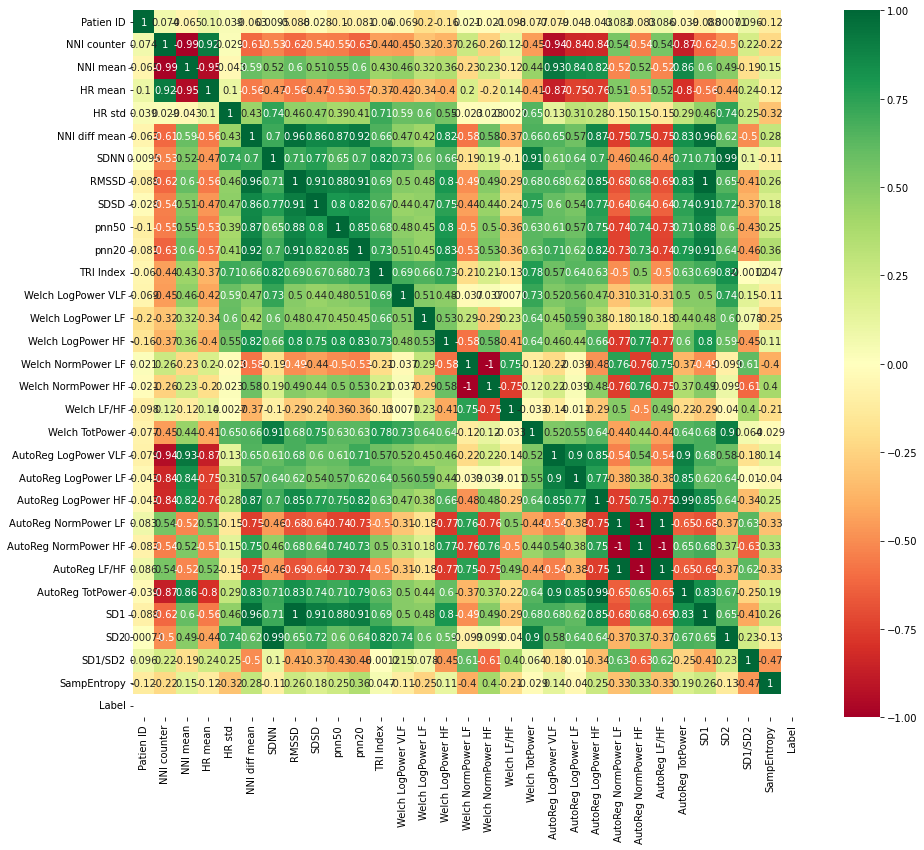

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,13))
g=sns.heatmap(L.corr(),annot=True,cmap="RdYlGn")

In [82]:
# VISUALIZING THE ALL THE DOMAINS [TIME DOMIAN,FREQUENCY DOMAIN , NON-LINEAR DOMAIN} FROM EVERY CONDICTION

In [105]:
# TIME DOMAIN 
Ltime=L.iloc[:,1:12]
Ltime

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,TRI Index
2,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,28.937729,7.025641
11,206.0,865.558252,69.699199,5.265377,34.141463,63.302557,43.112162,26.389698,22.926829,63.902439,14.714286
26,244.0,731.049180,82.231530,3.553502,17.090535,32.634364,22.257842,14.288643,3.292181,31.275720,8.413793
29,197.0,905.791878,66.465394,3.904720,44.892857,52.682165,51.883455,26.076687,38.775510,83.163265,11.588235
35,189.0,943.010582,63.942715,4.519494,34.180851,66.800273,45.384879,29.936997,19.148936,59.574468,12.600000
...,...,...,...,...,...,...,...,...,...,...,...
536,201.0,890.472637,67.595670,3.976633,28.140000,48.815372,34.254635,19.581562,15.000000,61.500000,10.578947
539,240.0,743.300000,80.929787,4.115169,21.786611,37.992644,27.919715,17.496712,7.112971,45.606695,7.272727
548,217.0,822.142857,73.487764,6.255206,29.953704,67.396923,38.129045,23.647168,16.666667,58.796296,18.083333
551,191.0,932.743455,64.460106,3.013400,25.752632,41.733517,31.796143,18.698580,7.894737,56.842105,9.550000


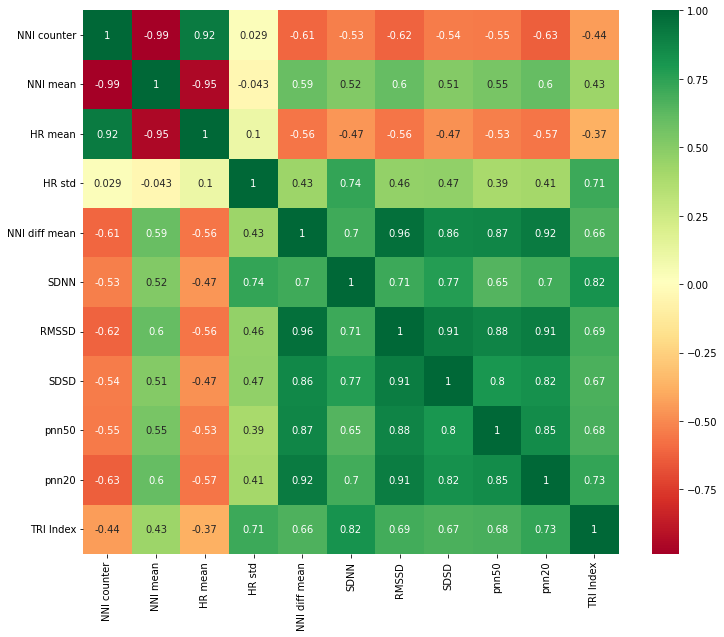

In [108]:

import matplotlib.pyplot as plt

plt.figure(figsize=(12,10))
g=sns.heatmap(Ltime.corr(),annot=True,cmap="RdYlGn")

In [85]:
# FREQUENCY DOMAIN 
Lfrequency=L.iloc[:,12:26]
Lfrequency

,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch NormPower LF,Welch NormPower HF,Welch LF/HF,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower
2,5.086065,5.151501,5.402975,43.746070,56.253930,0.777654,556.508532,7.799405,8.515669,9.099743,35.799574,64.200426,0.557622,16384.528244
11,4.906276,7.449614,6.865253,64.207018,35.792982,1.793844,2812.723695,7.843952,8.584618,9.208802,34.883054,65.116946,0.535699,17883.643876
26,6.059830,6.193538,5.648680,63.294161,36.705839,1.724362,1201.794293,7.813580,8.545086,9.142005,35.504891,64.495109,0.550505,16954.872039
29,6.013475,6.708784,6.961580,43.713527,56.286473,0.776626,2283.774719,7.844286,8.561939,9.217563,34.172345,65.827655,0.519118,17852.409641
35,7.525326,7.978727,6.456450,82.087352,17.912648,4.582647,5409.426561,7.843611,8.584021,9.208045,34.886678,65.113322,0.535784,17872.023595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,7.480781,6.646091,5.933975,67.086859,32.913141,2.038300,2921.048398,7.839860,8.574036,9.192438,35.014499,64.985501,0.538805,17654.867380
539,5.404187,6.035346,5.584920,61.074065,38.925935,1.568981,906.657821,7.817603,8.535619,9.168026,34.696505,65.303495,0.531312,17162.611935
548,7.762053,7.554252,6.534724,73.488064,26.511936,2.771886,4947.210021,7.839249,8.569041,9.184541,35.080545,64.919455,0.540370,17549.681864
551,6.028666,5.594719,5.200209,59.736797,40.263203,1.483657,865.473026,7.842278,8.587345,9.183853,35.514302,64.485698,0.550731,17647.962602


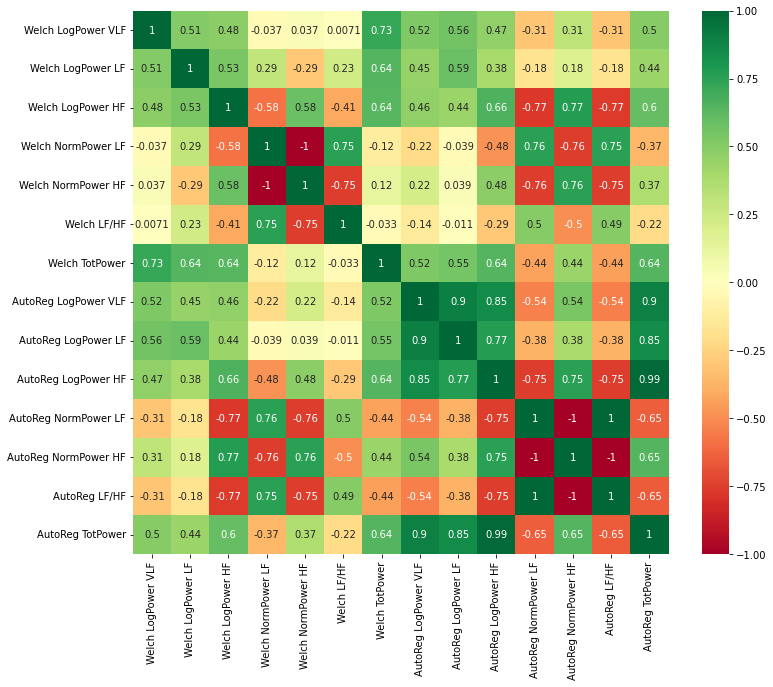

In [86]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Lfrequency.corr(),annot=True,cmap="RdYlGn")

In [87]:
# Non-linear
Lnonlinear=L.iloc[:,26:30]
Lnonlinear

,SD1,SD2,SD1/SD2,SampEntropy
2,14.639016,43.653040,2.981966,1.549774
11,30.483805,83.829865,2.749980,1.400088
26,15.738668,43.328262,2.752981,1.553938
29,36.684098,64.498141,1.758204,1.448598
35,32.091952,88.655830,2.762556,1.364839
...,...,...,...,...
536,24.216911,64.165791,2.649627,1.650065
539,19.741771,49.909407,2.528112,1.562693
548,26.960683,91.353911,3.388412,1.399874
551,22.483231,54.475198,2.422926,1.501428


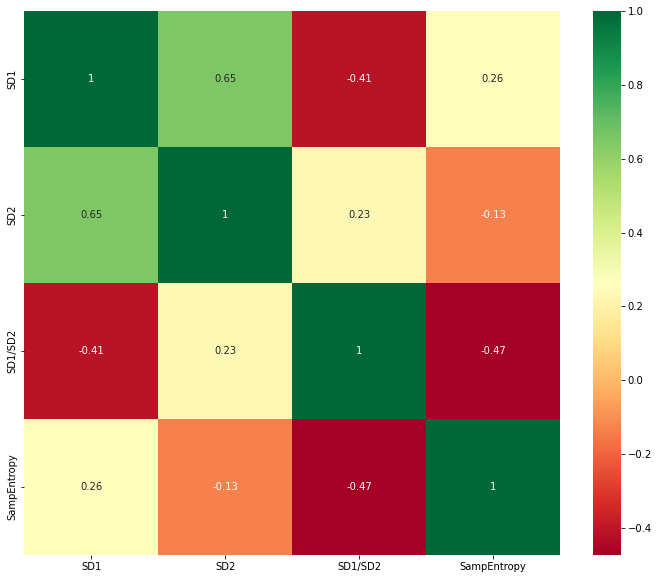

In [88]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Lnonlinear.corr(),annot=True,cmap="RdYlGn")

In [ ]:
# HIGH POSTIVE EMOTION

In [106]:
H=df[df['Label']==309]
H

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
14,5.0,286.0,625.611888,96.009236,3.128001,7.540351,20.720523,9.853844,6.354766,0.000000,...,9.074489,35.883906,64.116094,0.559671,16026.338190,6.967684,28.355258,4.069538,1.113851,309.0
23,8.0,254.0,700.401575,85.850837,4.007949,11.201581,32.646692,14.296134,8.900401,0.000000,...,9.109994,35.737543,64.262457,0.556119,16522.707338,10.108838,45.045453,4.456047,1.179976,309.0
32,11.0,224.0,798.566964,75.377255,4.295706,21.219731,45.461016,26.273313,15.527110,4.035874,...,9.130536,35.560137,64.439863,0.551834,16814.174821,18.577465,61.134102,3.290767,1.552087,309.0
50,17.0,148.0,758.612686,50.842676,7.595670,22.989770,52.880231,30.835042,19.303107,8.780618,...,9.147733,33.719711,66.280289,0.508744,16986.117206,21.801603,70.411698,1.432337,1.453736,309.0
59,20.0,190.0,935.994737,64.830087,7.185914,54.994709,95.973734,69.786977,43.076935,45.502646,...,9.229074,34.183251,65.816749,0.519370,18023.882666,49.346545,125.577578,2.544810,1.563145,309.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,170.0,157.0,758.612686,53.354395,3.901464,22.989770,69.595768,30.835042,19.303107,8.780618,...,9.261140,34.354426,65.645574,0.523332,18645.507373,21.801603,78.431440,1.325284,1.854560,309.0
518,173.0,273.0,655.413919,92.280510,8.226540,22.169118,59.085003,29.563615,19.594621,7.352941,...,9.100027,36.797247,63.202753,0.582210,16651.688478,20.904423,80.826379,3.866473,1.160664,309.0
530,177.0,213.0,838.737089,72.116552,6.580292,43.877358,74.714907,58.754687,39.167934,28.301887,...,9.211082,34.487858,65.512142,0.526435,17810.778312,41.545717,97.141393,2.338181,1.483024,309.0
533,178.0,261.0,684.126437,87.869295,3.778533,11.242308,30.260715,14.897470,9.793571,1.153846,...,9.105143,36.021762,63.978238,0.563031,16523.071315,10.534043,41.457790,3.935601,1.243090,309.0


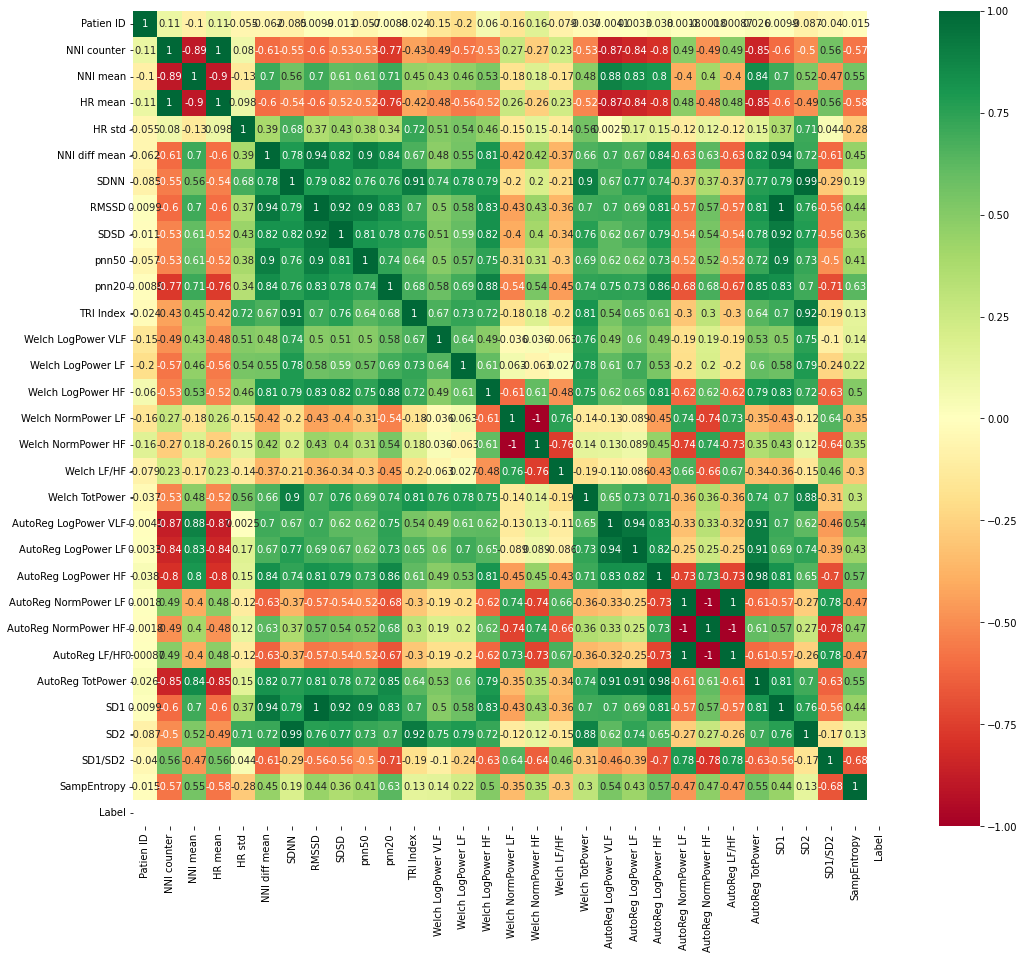

In [117]:
plt.figure(figsize=(17,15))
gt=sns.heatmap(H.corr(),annot=True,cmap="RdYlGn")

In [90]:
# TIME DOMAIN
Htime=H.iloc[:,1:12]
Htime

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,TRI Index
14,286.0,625.611888,96.009236,3.128001,7.540351,20.720523,9.853844,6.354766,0.000000,5.614035,5.720000
23,254.0,700.401575,85.850837,4.007949,11.201581,32.646692,14.296134,8.900401,0.000000,13.833992,7.696970
32,224.0,798.566964,75.377255,4.295706,21.219731,45.461016,26.273313,15.527110,4.035874,46.636771,10.666667
50,148.0,758.612686,50.842676,7.595670,22.989770,52.880231,30.835042,19.303107,8.780618,88.435374,11.959030
59,190.0,935.994737,64.830087,7.185914,54.994709,95.973734,69.786977,43.076935,45.502646,76.190476,17.272727
...,...,...,...,...,...,...,...,...,...,...,...
509,157.0,758.612686,53.354395,3.901464,22.989770,69.595768,30.835042,19.303107,8.780618,79.487179,11.214286
518,273.0,655.413919,92.280510,8.226540,22.169118,59.085003,29.563615,19.594621,7.352941,40.808824,13.000000
530,213.0,838.737089,72.116552,6.580292,43.877358,74.714907,58.754687,39.167934,28.301887,68.396226,17.750000
533,261.0,684.126437,87.869295,3.778533,11.242308,30.260715,14.897470,9.793571,1.153846,13.076923,7.676471


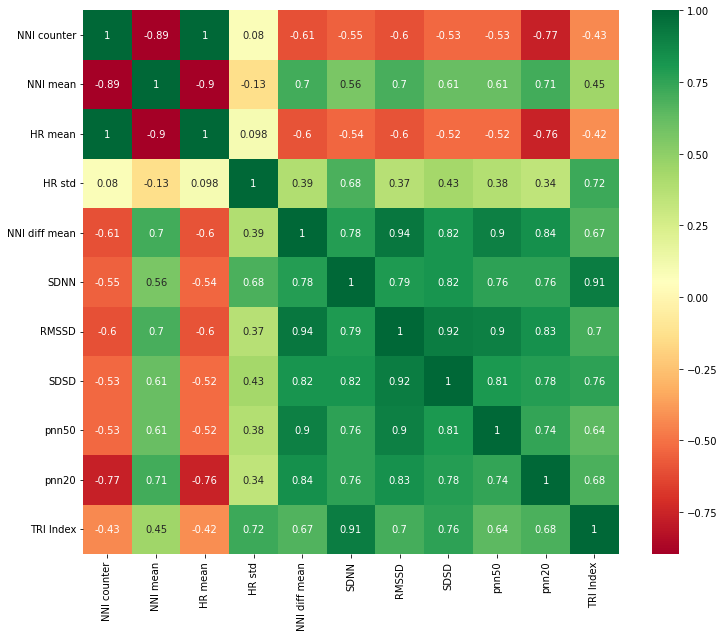

In [91]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Htime.corr(),annot=True,cmap="RdYlGn")

In [92]:
# FREQUENCY
Hfrequency=H.iloc[:,12:26]
Hfrequency

,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch NormPower LF,Welch NormPower HF,Welch LF/HF,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower
14,6.769399,5.471302,3.762674,84.665821,15.334179,5.521380,338.798117,7.787729,8.494083,9.074489,35.883906,64.116094,0.559671,16026.338190
23,6.477022,6.451085,4.169425,90.734676,9.265324,2.129139,1348.099893,7.802714,8.523221,9.109994,35.737543,64.262457,0.556119,16522.707338
32,5.979851,7.314492,5.629196,84.360454,15.639546,5.394048,2175.727745,7.818484,8.536029,9.130536,35.560137,64.439863,0.551834,16814.174821
50,7.207168,8.679433,5.933975,26.840554,73.159446,0.366877,2303.470105,7.809671,8.539063,9.147733,33.719711,66.280289,0.508744,16986.117206
59,7.450544,7.743502,7.281005,61.360645,38.639355,1.588035,5479.781765,7.841045,8.573936,9.229074,34.183251,65.816749,0.519370,18023.882666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
509,6.917455,7.754179,7.788247,49.148384,50.851616,0.966506,5753.125611,7.870300,8.613600,9.261140,34.354426,65.645574,0.523332,18645.507373
518,6.254180,7.874091,6.091689,85.599328,14.400672,5.944120,3590.646240,7.816885,8.559102,9.100027,36.797247,63.202753,0.582210,16651.688478
530,7.376186,7.863612,6.913996,72.103786,27.896214,2.584716,5204.642324,7.837992,8.569454,9.211082,34.487858,65.512142,0.526435,17810.778312
533,5.916568,5.451741,3.596405,86.475241,13.524759,6.393847,640.766617,7.805265,8.530724,9.105143,36.021762,63.978238,0.563031,16523.071315


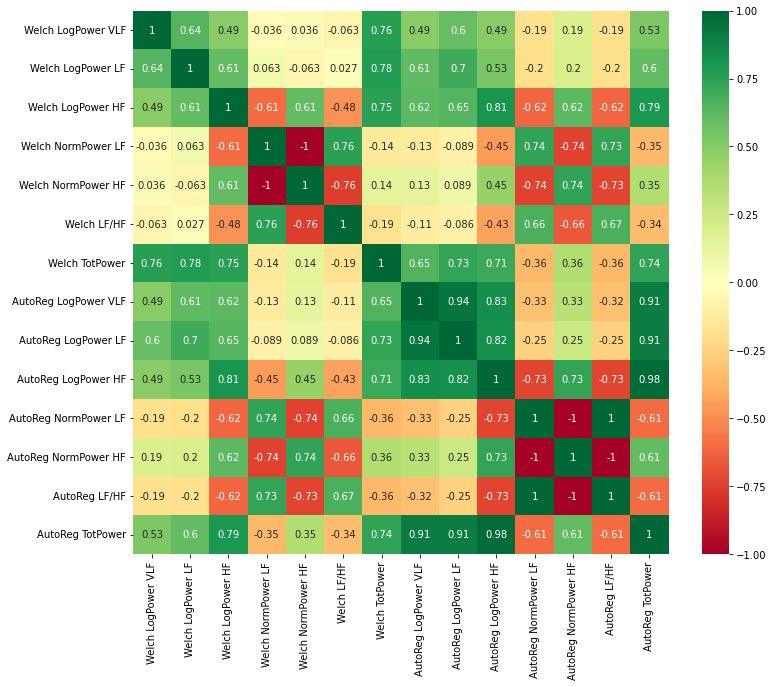

In [93]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Hfrequency.corr(),annot=True,cmap="RdYlGn")

In [118]:
# NON_LINEAR DOMAIN
Hnonlinear=H.iloc[:,26:30]
Hnonlinear

,SD1,SD2,SD1/SD2,SampEntropy
14,6.967684,28.355258,4.069538,1.113851
23,10.108838,45.045453,4.456047,1.179976
32,18.577465,61.134102,3.290767,1.552087
50,21.801603,70.411698,1.432337,1.453736
59,49.346545,125.577578,2.544810,1.563145
...,...,...,...,...
509,21.801603,78.431440,1.325284,1.854560
518,20.904423,80.826379,3.866473,1.160664
530,41.545717,97.141393,2.338181,1.483024
533,10.534043,41.457790,3.935601,1.243090


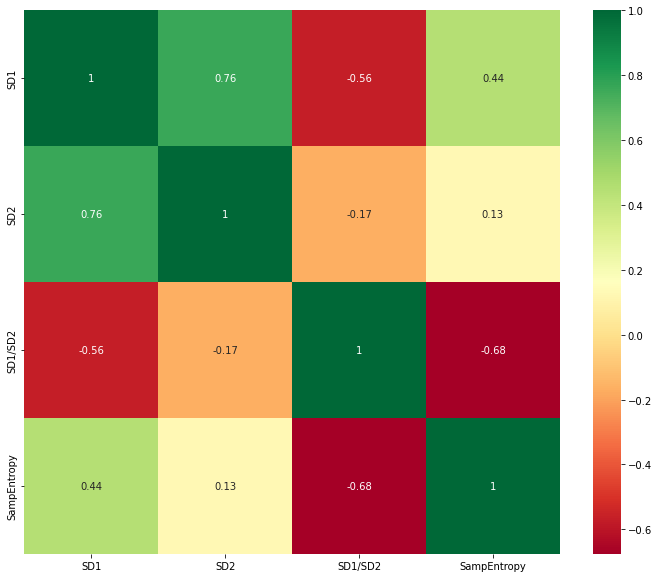

In [119]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Hnonlinear.corr(),annot=True,cmap="RdYlGn")

In [ ]:
# NUTROL EMOTION

In [120]:
N=df[df['Label']==108]

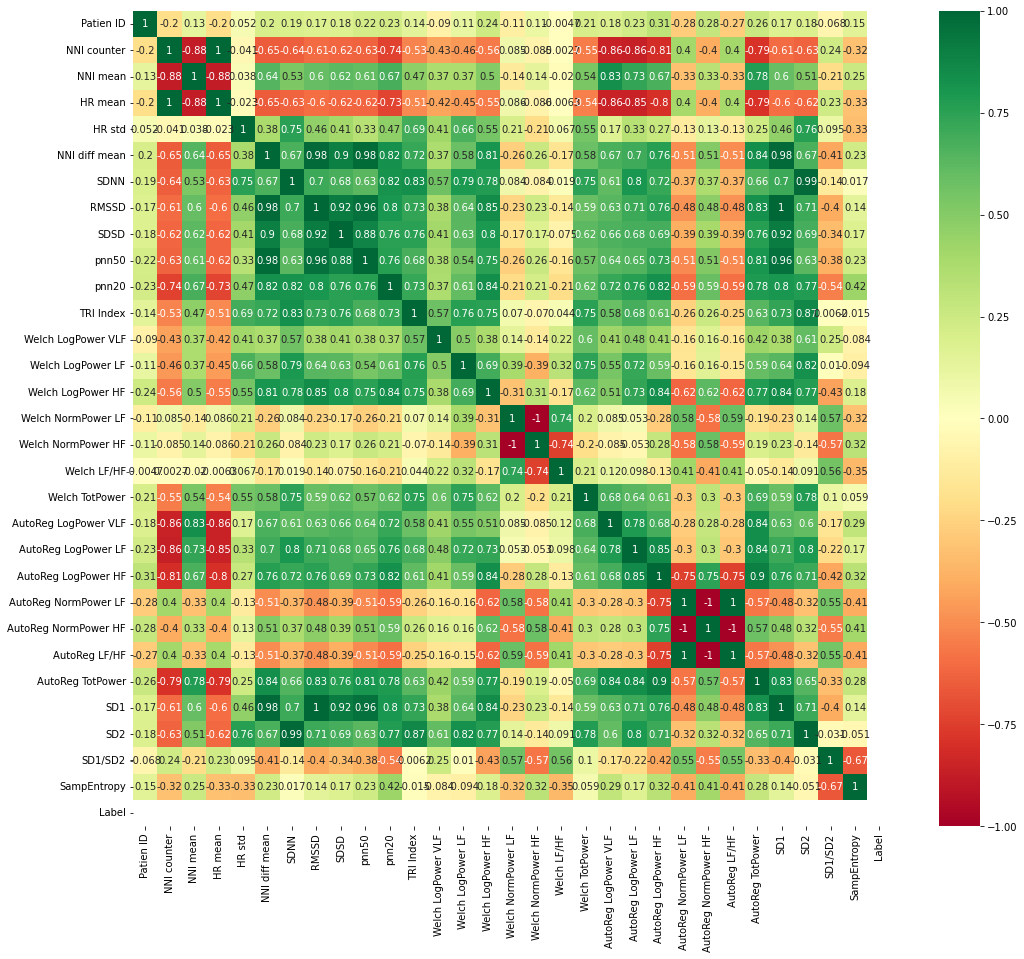

In [121]:
plt.figure(figsize=(17,15))
gt=sns.heatmap(N.corr(),annot=True,cmap="RdYlGn")

In [98]:
# TIME DOMAIN
Ntime=N.iloc[:,1:12]
Ntime

,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,pnn20,TRI Index
5,259.0,688.104247,87.420981,4.390448,17.329457,35.476719,21.703517,13.091863,1.937984,36.046512,8.093750
8,194.0,922.541237,65.333858,4.453019,32.341969,61.869165,40.365172,24.215335,21.761658,62.694301,13.857143
17,234.0,763.341880,78.779441,3.708727,21.175966,36.825225,26.254940,15.554380,3.862661,47.639485,9.000000
20,231.0,772.264069,77.845396,3.431201,19.500000,34.411505,24.134857,14.252174,2.173913,44.347826,7.965517
38,248.0,720.697581,83.463891,4.215374,20.870445,36.374921,25.925227,15.411148,6.477733,44.129555,8.857143
41,274.0,652.846715,92.038598,3.452284,12.611722,25.367451,16.967864,11.372187,1.098901,18.315018,6.227273
53,206.0,865.907767,69.469121,3.562136,28.156098,43.521637,34.638763,20.225567,16.585366,54.634146,9.363636
56,208.0,856.605769,70.216832,3.504828,22.222222,42.557587,27.798968,16.742449,7.729469,43.478261,9.904762
65,261.0,684.356322,87.732074,2.284354,9.238462,17.606365,11.629869,7.077949,0.000000,7.692308,4.350000
74,246.0,725.483740,82.835315,3.334073,16.273469,28.871951,20.818849,13.011136,2.857143,28.979592,7.235294


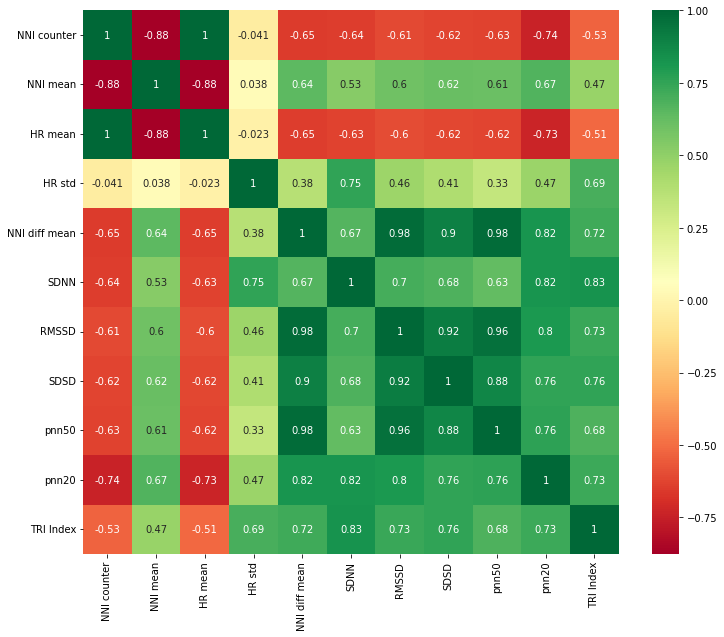

In [99]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Ntime.corr(),annot=True,cmap="RdYlGn")

In [100]:
# FREQUENCY DOMAIN
Nfrequency=N.iloc[:,12:26]
Nfrequency

,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch NormPower LF,Welch NormPower HF,Welch LF/HF,Welch TotPower,AutoReg LogPower VLF,AutoReg LogPower LF,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower
5,5.369432,6.836991,4.763691,88.828090,11.171910,2.129139,1263.600334,7.804552,8.516623,9.106751,35.660537,64.339463,0.554256,16464.842055
8,7.920753,7.200073,6.451451,67.887838,32.112162,2.114085,4726.994692,7.837095,8.584136,9.196857,35.143881,64.856119,0.541875,17745.074062
17,7.001451,6.367873,5.669151,66.790443,33.209557,2.011181,1970.830527,7.814858,8.536999,9.137266,35.428272,64.571728,0.548665,16872.469027
20,5.633060,5.850851,5.174081,66.301762,33.698238,1.967514,803.680279,7.822946,8.538122,9.129831,35.624280,64.375720,0.553381,16829.461757
38,6.307575,6.383217,5.393702,72.899220,27.100780,2.689931,1360.557402,7.801896,8.524921,9.135383,35.195390,64.804610,0.543100,16761.852031
41,6.769399,5.731321,4.569865,76.159717,23.840283,3.194581,462.684586,7.794255,8.526109,9.108393,35.840722,64.159278,0.558621,16502.165266
53,6.366699,6.380852,5.841525,63.165576,36.834424,1.714852,1516.867875,7.836084,8.567770,9.188411,34.963574,65.036426,0.537600,17572.761016
56,7.042422,6.488327,5.357619,75.596944,24.403056,3.097847,2013.796653,7.832939,8.557893,9.152085,35.567359,64.432641,0.552008,17164.124339
65,6.769399,6.805992,3.628733,64.984143,35.015857,1.855849,136.165027,7.802489,8.516369,9.111239,35.551818,64.448182,0.551634,16499.074641
74,5.639970,6.178894,5.303594,70.584719,29.415281,2.399594,964.970274,7.805242,8.522023,9.113619,35.626869,64.373131,0.553443,16555.726045


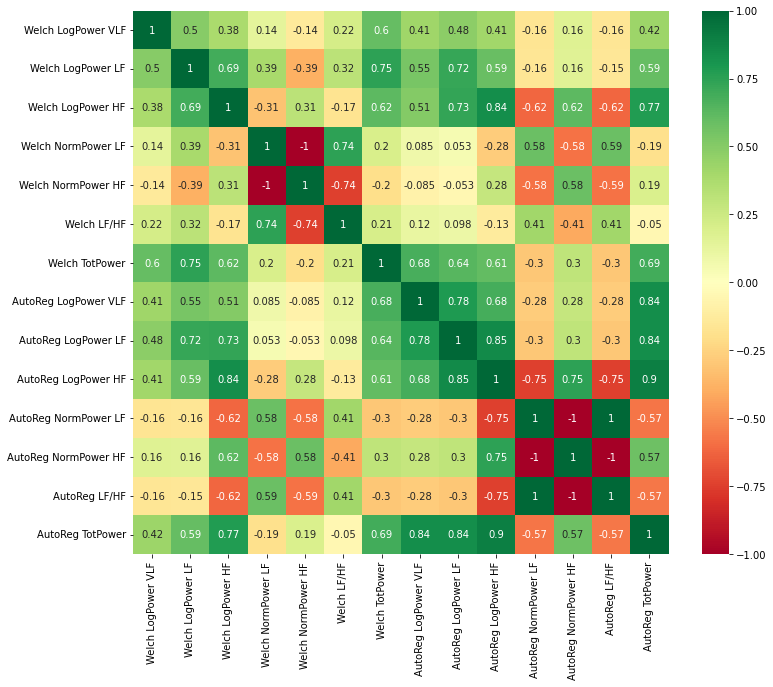

In [101]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Nfrequency.corr(),annot=True,cmap="RdYlGn")

In [ ]:
# NON-LINEAR DOMAIN
Nnonlinear=N.iloc[:,12:26]

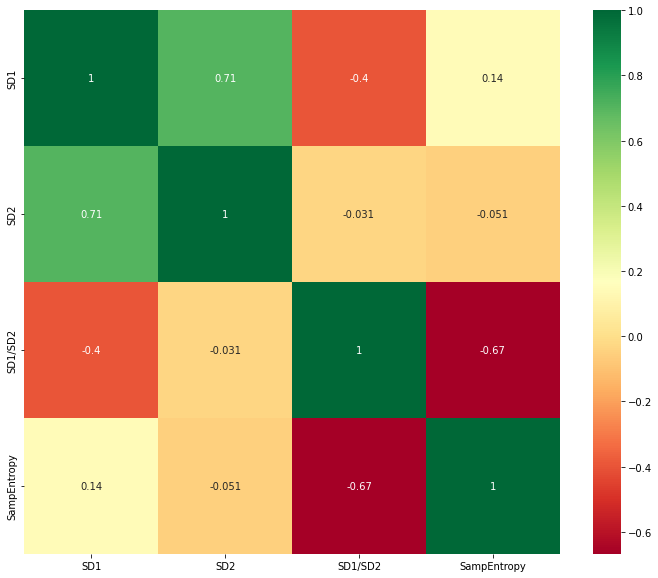

In [103]:
plt.figure(figsize=(12,10))
gt=sns.heatmap(Nnonlinear.corr(),annot=True,cmap="RdYlGn")

In [ ]:
# FEATURE EXTRACTION 

In [ ]:
# BY EXPLORING , I ACKNOWLEDGE THE IMPORTANT  FREATURES WHICH HELP THE MODEL TO  PREDECT BEST  OUTCOME.

In [142]:
df.iloc[:,:]

,Patien ID,NNI counter,NNI mean,HR mean,HR std,NNI diff mean,SDNN,RMSSD,SDSD,pnn50,...,AutoReg LogPower HF,AutoReg NormPower LF,AutoReg NormPower HF,AutoReg LF/HF,AutoReg TotPower,SD1,SD2,SD1/SD2,SampEntropy,Label
0,1.0,472.0,633.067797,95.111328,5.596500,14.685775,38.126336,19.698201,13.142063,1.910828,...,9.060048,35.557355,64.442645,0.551767,15674.539755,13.928721,52.054050,3.737174,1.196584,-1.0
1,1.0,282.0,633.797872,94.957639,5.295495,15.437722,34.964419,19.589561,12.080853,1.067616,...,9.108754,35.414741,64.585259,0.548341,16393.972788,13.851732,47.446242,3.425293,1.391884,208.0
2,1.0,274.0,653.729927,92.000089,4.418761,15.260073,32.661771,20.702851,14.016342,1.831502,...,9.099743,35.799574,64.200426,0.557622,16384.528244,14.639016,43.653040,2.981966,1.549774,308.0
3,2.0,438.0,682.826484,88.128099,4.771772,16.157895,37.144495,20.816458,13.139347,2.059497,...,9.060304,36.066585,63.933415,0.564127,15815.174364,14.719457,50.414864,3.425049,1.435334,-1.0
4,2.0,268.0,666.746269,90.255192,4.875405,15.198502,36.593564,19.099385,11.588573,1.123596,...,9.121223,35.383463,64.616537,0.547591,16590.789950,13.500916,49.575219,3.671989,1.423566,208.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185.0,347.0,515.818444,79.276563,7.384019,11.962428,37.752447,23.626856,20.404213,1.734104,...,9.105778,34.654331,65.345669,0.530323,16147.875484,16.706709,50.518112,3.023822,0.906509,208.0
554,185.0,324.0,550.521605,109.223667,4.937727,13.167183,26.510752,17.750856,11.923015,1.547988,...,9.094684,35.006366,64.993634,0.538612,16082.202403,12.551746,35.237809,2.807403,1.118727,309.0
555,186.0,390.0,764.643590,78.587904,3.107465,14.753213,29.648908,18.342430,10.913000,0.514139,...,9.075834,35.652062,64.347938,0.554051,15954.796546,12.969918,39.699427,3.060885,1.588712,-1.0
556,186.0,232.0,766.500000,78.477504,4.015693,15.614719,38.337192,19.157018,11.122384,0.865801,...,9.157152,35.052305,64.947695,0.539701,17076.379939,13.544685,52.275968,3.859519,1.304293,209.0


In [143]:
df.columns

Index(['Patien ID', 'NNI counter', 'NNI mean', 'HR mean', 'HR std',
       'NNI diff mean', 'SDNN', 'RMSSD', 'SDSD', 'pnn50', 'pnn20', 'TRI Index',
       'Welch LogPower VLF', 'Welch LogPower LF', 'Welch LogPower HF',
       'Welch NormPower LF', 'Welch NormPower HF', 'Welch LF/HF',
       'Welch TotPower', 'AutoReg LogPower VLF', 'AutoReg LogPower LF',
       'AutoReg LogPower HF', 'AutoReg NormPower LF', 'AutoReg NormPower HF',
       'AutoReg LF/HF', 'AutoReg TotPower', 'SD1', 'SD2', 'SD1/SD2',
       'SampEntropy', 'Label'],
      dtype='object')

In [182]:
IMP_FEATURES=['Patien ID','NNI counter','HR mean','SDNN','RMSSD','SDSD','pnn50','Welch LogPower VLF','Welch LogPower LF', 'Welch LogPower HF','Welch LF/HF','SD2', 'SD1/SD2', 'SampEntropy','Label']

In [200]:
df1=df[IMP_FEATURES]


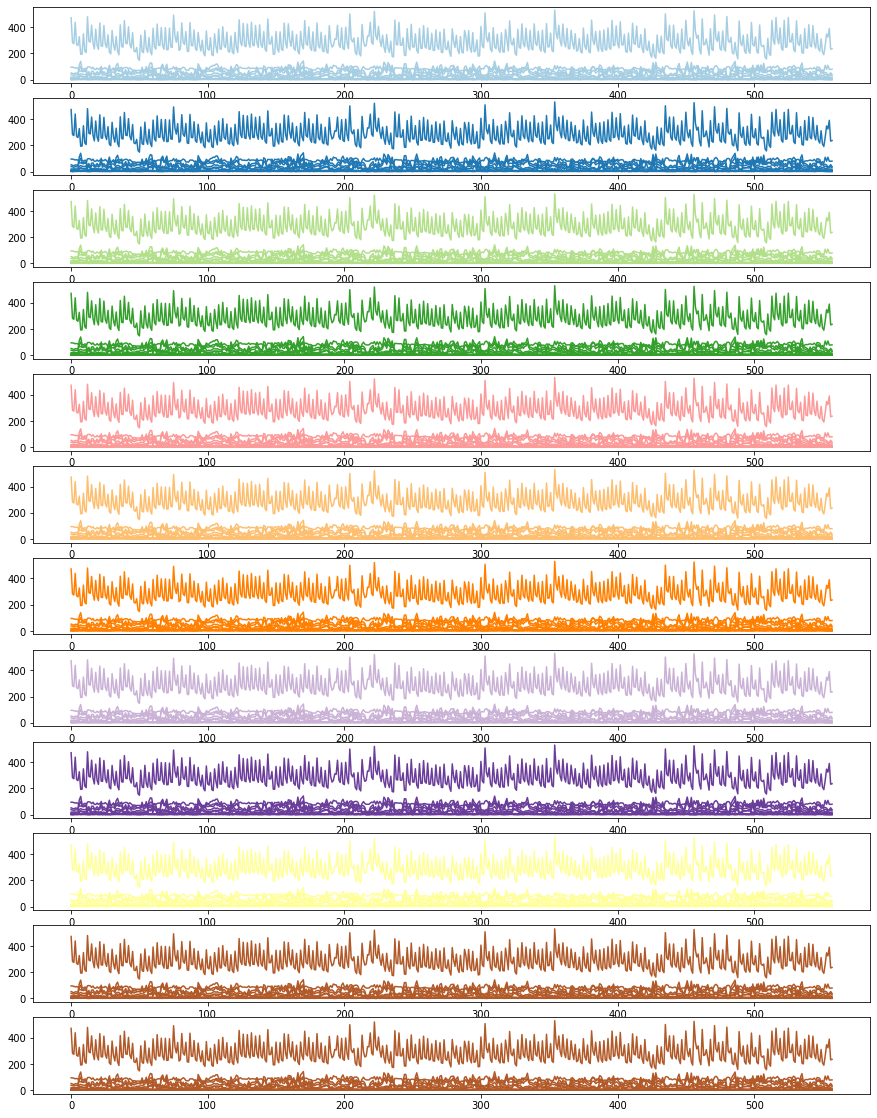

In [202]:
fig,axes=plt.subplots(12,1,figsize=(15,20))

for i, ax in enumerate(axes.flatten()):
    y=df1.iloc[:,1:-1].values
    ax.plot(y,color=plt.cm.Paired(i/10))
plt.show()

In [203]:
# with the following function we can remove highly correlated features

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr



In [238]:
corr_features1 = correlation(df1.iloc[:,:], 0.70)
len(set(corr_features1))

6

In [239]:
corr_features1

{'Label', 'SD2', 'SDSD', 'Welch LogPower HF', 'Welch LogPower VLF', 'pnn50'}

In [206]:
# FEATURE SCALING

In [207]:
from sklearn.preprocessing import MinMaxScaler

In [210]:

minmaxscaler = MinMaxScaler(feature_range=(0,1))
scaled_df = minmaxscaler.fit_transform(df1.iloc[:,1:-1])
x= pd.DataFrame(df1.iloc[:,0:1])
x[df1.iloc[:,1:-1].columns]=df1.iloc[:,1:-1]
y= pd.DataFrame(df1.iloc[:,-1:])
x


,Patien ID,NNI counter,HR mean,SDNN,RMSSD,SDSD,pnn50,Welch LogPower VLF,Welch LogPower LF,Welch LogPower HF,Welch LF/HF,SD2,SD1/SD2,SampEntropy
0,1.0,472.0,95.111328,38.126336,19.698201,13.142063,1.910828,6.459789,5.954668,5.480991,1.605889,52.054050,3.737174,1.196584
1,1.0,282.0,94.957639,34.964419,19.589561,12.080853,1.067616,6.067162,5.074719,5.728798,0.519921,47.446242,3.425293,1.391884
2,1.0,274.0,92.000089,32.661771,20.702851,14.016342,1.831502,5.086065,5.151501,5.402975,0.777654,43.653040,2.981966,1.549774
3,2.0,438.0,88.128099,37.144495,20.816458,13.139347,2.059497,5.665276,7.055840,5.573466,4.403387,50.414864,3.425049,1.435334
4,2.0,268.0,90.255192,36.593564,19.099385,11.588573,1.123596,6.200045,6.282032,4.984397,3.660629,49.575219,3.671989,1.423566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553,185.0,347.0,79.276563,37.752447,23.626856,20.404213,1.734104,5.953055,5.007871,4.853379,1.167065,50.518112,3.023822,0.906509
554,185.0,324.0,109.223667,26.510752,17.750856,11.923015,1.547988,4.729062,5.177652,5.142406,1.035874,35.237809,2.807403,1.118727
555,186.0,390.0,78.587904,29.648908,18.342430,10.913000,0.514139,5.498850,5.458078,5.053215,1.499097,39.699427,3.060885,1.588712
556,186.0,232.0,78.477504,38.337192,19.157018,11.122384,0.865801,6.327419,4.868971,5.141493,0.761456,52.275968,3.859519,1.304293


In [853]:
# Feature selection 

In [213]:
from sklearn.feature_selection import SelectFromModel

In [214]:
from sklearn.ensemble import ExtraTreesClassifier

In [234]:
clf = ExtraTreesClassifier(n_estimators=50).fit(x,y)

C:\Temp\ipykernel_13916\3473579.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = ExtraTreesClassifier(n_estimators=50).fit(x,y)


In [235]:
model = SelectFromModel(clf,threshold = "median", prefit=True)

In [236]:
# To visualize the selected features we can use get_support()
model.get_support()

array([False,  True,  True,  True, False, False, False,  True, False,
       False,  True, False,  True,  True])

In [240]:
# To know the name of the selected features
x.iloc[:,:].columns[model.get_support()==True]

Index(['NNI counter', 'HR mean', 'SDNN', 'Welch LogPower VLF', 'Welch LF/HF',
       'SD1/SD2', 'SampEntropy'],
      dtype='object')

In [257]:
features_DT = pd.DataFrame({'Feature':list(x.iloc[:,:].columns),'Ranking':clf.feature_importances_})
best=features_DT.sort_values(by='Ranking',ascending=False)
bestfeatures=best['Feature'].values[:8]
x1=x[bestfeatures]
print(len(bestfeatures))
bestfeatures


8


array(['NNI counter', 'SampEntropy', 'HR mean', 'SD1/SD2',
       'Welch LogPower VLF', 'SDNN', 'Welch LF/HF', 'Welch LogPower LF'],
      dtype=object)

In [258]:
x1

,NNI counter,SampEntropy,HR mean,SD1/SD2,Welch LogPower VLF,SDNN,Welch LF/HF,Welch LogPower LF
0,472.0,1.196584,95.111328,3.737174,6.459789,38.126336,1.605889,5.954668
1,282.0,1.391884,94.957639,3.425293,6.067162,34.964419,0.519921,5.074719
2,274.0,1.549774,92.000089,2.981966,5.086065,32.661771,0.777654,5.151501
3,438.0,1.435334,88.128099,3.425049,5.665276,37.144495,4.403387,7.055840
4,268.0,1.423566,90.255192,3.671989,6.200045,36.593564,3.660629,6.282032
...,...,...,...,...,...,...,...,...
553,347.0,0.906509,79.276563,3.023822,5.953055,37.752447,1.167065,5.007871
554,324.0,1.118727,109.223667,2.807403,4.729062,26.510752,1.035874,5.177652
555,390.0,1.588712,78.587904,3.060885,5.498850,29.648908,1.499097,5.458078
556,232.0,1.304293,78.477504,3.859519,6.327419,38.337192,0.761456,4.868971


In [259]:
np.median(clf.feature_importances_)

0.05440416115777505

In [ ]:
# Building the model

In [260]:
from sklearn.model_selection import train_test_split 

In [261]:
x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.33, random_state=42)

In [313]:
from sklearn.ensemble import GradientBoostingClassifier

In [314]:

grad=GradientBoostingClassifier(learning_rate=0.01,n_estimators=90)

In [315]:
grad.fit(x_train,y_train)

c:\Users\Tharun reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(learning_rate=0.01, n_estimators=90)

In [316]:
y_predict2=grad.predict(x_test)
y_predict2

array([208., 208., 209., 208., 208., 208., 209.,  -1.,  -1.,  -1., 108.,
       209.,  -1., 209., 108., 209.,  -1., 308.,  -1., 208., 208.,  -1.,
        -1.,  -1.,  -1., 209., 108., 108., 108.,  -1., 208.,  -1., 208.,
       209.,  -1.,  -1.,  -1., 108.,  -1.,  -1.,  -1.,  -1., 209., 208.,
       309., 108.,  -1.,  -1., 208., 209., 308., 309., 108., 209., 209.,
        -1., 209., 108.,  -1., 208., 208.,  -1., 209., 309., 108., 209.,
       209.,  -1.,  -1., 209.,  -1., 209.,  -1., 108., 108., 308., 208.,
        -1.,  -1., 208.,  -1., 108., 309., 208.,  -1.,  -1.,  -1., 208.,
       208., 308.,  -1.,  -1., 208., 108., 209.,  -1.,  -1., 309.,  -1.,
       309., 309., 208., 308.,  -1., 208., 308.,  -1., 308., 308., 208.,
        -1., 208., 108., 309., 308., 308.,  -1., 308.,  -1., 309., 209.,
        -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1., 308.,  -1.,  -1., 208.,
        -1.,  -1., 208., 108., 108., 208., 108., 208., 108., 209., 309.,
       308., 108.,  -1., 309., 308., 108., 208., 30

In [317]:
grad.score(x_test,y_test)

0.5405405405405406

In [318]:
from sklearn.metrics import accuracy_score
accuracy_score(y_predict2,y_test)

0.5405405405405406

In [301]:
from sklearn.linear_model import Lasso,RidgeCV,LassoCV,ElasticNet,ElasticNetCV,LogisticRegression

In [303]:
lognewtoncg=LogisticRegression(solver='newton-cg')

In [304]:
lr.fit(x_train,y_train)

LinearRegression()

In [305]:
y_predict2=lr.predict(x_test)

In [322]:
lr.score(x_train,y_train)

0.7100736555152821

In [306]:
lr.score(x_test,y_test)

0.7374398135816231

In [307]:
lassocv=LassoCV(alphas=None,cv=5,max_iter=2000000,normalize=True)
lassocv.fit(x_train,y_train)

c:\Users\Tharun reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1614: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Tharun reddy\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter al

LassoCV(cv=5, max_iter=2000000, normalize=True)

In [308]:
lasso=Lasso(alpha=lassocv.alpha_)
lasso.fit(x_train,y_train)

Lasso(alpha=0.11334839351282576)

In [309]:
lasso.score(x_test,y_test)

0.7377359236742329